In marketing, the CLV **Customer Lifetime Value** is one of the key metrics to have and monitor. The CLV measures customers' total worth to the business over the course of their lifetime relationship with the company. This metric is especially important to keep track of for acquiring new customers. It is generally more expensive to acquire new customers than to keep existing customers, so knowing the lifetime value and the costs associated with acquiring new customers is essential in order to build marketing strategies with a positive ROI.

For example, if the average CLV of your customer is $100 and it only costs $10 to acquire a new customer, then your business will be generating more revenue as you acquire new customers.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Data

In [3]:
df = pd.read_excel('C:/training/data/Online Retail.xlsx', sheet_name='Online Retail')
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EAD Data

#### - Negative Quantity

In [5]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [6]:
df.shape

(541909, 8)

In [7]:
df = df.loc[df['Quantity'] > 0]

In [8]:
df.shape

(531285, 8)

#### - Missing CustomerID

In [9]:
pd.isnull(df['CustomerID']).sum()

133361

In [10]:
df.shape

(531285, 8)

In [11]:
df = df[pd.notnull(df['CustomerID'])]

In [12]:
df.shape

(397924, 8)

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month   
Since Dec has data only till Dec 9, it is important to process only full month sales 

In [14]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [15]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']
df.shape

(380620, 8)

#### - Total Sales

In [16]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Order Data

In [18]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00
           568172       310.00 2011-09-25 13:13:00
12349.0    577609      1757.55 2011-11-21 09:51:00
12350.0    543037       334.40 2011-02-02 16:01:00
12352.0    544156       296.50 2011-02-16 12:33:00
           545323       144.35 2011-03-01 14:57:00
           545332       840.30 2011-03-01 15:52:00
           546869       120.33 2011-03-17 16:00:00
           547390       160.33 2011-03-22 16:08:00
           567505       366.25 2011-09-20 14:34:00
           568699       266.25 2011-09-28 14:58:00
           574275       311.73 2011-11-03 14:37:00
12353.0    553900        89.00 2011-05-19 17:47:00
12354.0    550911      1079.40 2011-04-21 13:11:00
12355.0    552449       459.40 2011-05-09 13:49:00
12356.0    541430      2271.62 2011-01-18 09:50:00
           549435       481.46 2011-04-08 12:33:00
           576895        58.35 2011-11-17 08:40:00
12357.0    574740      6207.67 2011-11-06 16:07:00
12358.0    559707       484.86 2011-07-12 10:04:00
12359.0    540946       547.50 2011-01-12 12:43:00
...                        ...                 ...
18272.0    559813       753.66 2011-07-12 15:42:00
           563680       372.25 2011-08-18 12:06:00
           572617       604.25 2011-10-25 11:52:00
18273.0    547843        51.00 2011-03-27 11:22:00
           565480       102.00 2011-09-05 11:27:00
18274.0    575485       175.92 2011-11-09 17:03:00
18276.0    572990       335.86 2011-10-27 10:54:00
18277.0    570859       110.38 2011-10-12 15:22:00
18278.0    568492       173.90 2011-09-27 11:58:00
18280.0    545712       180.60 2011-03-07 09:52:00
18281.0    556464        80.82 2011-06-12 10:53:00
18282.0    562525       100.21 2011-08-05 13:35:00
18283.0    540350       108.45 2011-01-06 14:14:00
           541854       106.55 2011-01-23 14:58:00
           545079       102.90 2011-02-28 10:30:00
           550957       117.68 2011-04-21 16:37:00
           554157        99.47 2011-05-23 11:33:00
           556731       103.72 2011-06-14 11:41:00
           557956       203.81 2011-06-23 19:20:00
           560025       140.69 2011-07-14 13:00:00
           560032         2.50 2011-07-14 13:20:00
           565579       134.90 2011-09-05 12:35:00
           573093       114.65 2011-10-27 14:38:00
           575668       112.35 2011-11-10 14:59:00
           575675         1.95 2011-11-10 15:07:00
           578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

#  Data Analysis

In [19]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [20]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
12352.0       120.33    840.30   2506.04    313.255000   8.0   
12353.0        89.00     89.00     89.00     89.000000   1.0   
12354.0      1079.40   1079.40   1079.40   1079.400000   1.0   
12355.0       459.40    459.40    459.40    459.400000   1.0   
12356.0        58.35   2271.62   2811.43    937.143333   3.0   
12357.0      6207.67   6207.67   6207.67   6207.670000   1.0   
12358.0       484.86    484.86    484.86    484.860000   1.0   
12359.0       547.50   2876.85   6372.58   1593.145000   4.0   
12360.0       534.70   1083.58   2662.06    887.353333   3.0   
12361.0       189.90    189.90    189.90    189.900000   1.0   
12362.0       303.76    829.99   4697.19    521.910000   9.0   
12363.0       252.90    299.10    552.00    276.000000   2.0   
12364.0        79.80    623.92   1002.78    334.260000   3.0   
12365.0       320.69    320.69    641.38    320.690000   2.0   
12370.0       277.20   1590.82   3545.69    886.422500   4.0   
12371.0       360.00   1527.96   1887.96    943.980000   2.0   
12372.0       383.12    515.70   1298.04    432.680000   3.0   
12373.0       364.60    364.60    364.60    364.600000   1.0   
12374.0       742.93    742.93    742.93    742.930000   1.0   
12375.0       227.20    230.30    457.50    228.750000   2.0   
12377.0       626.60   1001.52   1628.12    814.060000   2.0   
12378.0      4008.62   4008.62   4008.62   4008.620000   1.0   
12379.0       392.40    459.84    852.24    426.120000   2.0   
12380.0       450.86   1040.39   2724.81    681.202500   4.0   
12381.0         4.50   1268.74   1698.30    424.575000   4.0   
...              ...       ...       ...           ...   ...   
18242.0       312.92   1225.49   2232.49    558.122500   4.0   
18245.0        35.60    439.18   1672.81    278.801667   6.0   
18246.0       232.90    363.20    596.10    298.050000   2.0   
18248.0       307.56    496.46    804.02    402.010000   2.0   
18249.0        95.34     95.34     95.34     95.340000   1.0   
18250.0       349.27    349.27    349.27    349.270000   1.0   
18251.0      4314.72   4314.72   4314.72   4314.720000   1.0   
18252.0        69.90    456.77    526.67    263.335000   2.0   
18255.0       103.30    103.30    103.30    103.300000   1.0   
18257.0        14.85    627.27   2337.63    292.203750   8.0   
18259.0       376.30   1070.40   2338.60    779.533333   3.0   
18260.0       230.70    557.07   2643.20    440.533333   6.0   
18261.0        99.44    224.80    324.24    162.120000   2.0   
18262.0       149.48    149.48    149.48    149.480000   1.0   
18263.0       307.60    503.80   1213.16    404.386667   3.0   
18265.0       312.96    488.55    801.51    400.755000   2.0   
18268.0        25.50     25.50     25.50     25.500000   1.0   
18269.0       168.60    168.60    168.60    168.600000   1.0   
18270.0       111.95    171.20    283.15    141.575000   2.0   
18272.0       340.72    753.66   2710.70    542.140000   5.0   
18273.0        51.00    102.00    153.00     76.500000   2.0   
18274.0       175.92    175.92    175.92    175.920000   1.0   
18276.0       335.86    335.86    335.86    335.860000   1.0   
18277.0       110.38    110.38    110.38    110.380000   1.0   
18278.0       173.90    173.90    173.90    173.900000   1.0   
18280.0       180.60    180.60    180.60    180.600000   1.0   
18281.0        80.82     80.82     80.82     80.820000   1.0   
18282.0       100.21    100.21    100.21    100.210000   1.0   
18283.0         1.95    313.65   1886.88    125

In [21]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
12352.0,120.33,840.30,2506.04,313.255000,8.0,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12353.0,89.00,89.00,89.00,89.000000,1.0,2011-05-19 17:47:00,2011-05-19 17:47:00,0,0.000000
12354.0,1079.40,1079.40,1079.40,1079.400000,1.0,2011-04-21 13:11:00,2011-04-21 13:11:00,0,0.000000
12355.0,459.40,459.40,459.40,459.400000,1.0,2011-05-09 13:49:00,2011-05-09 13:49:00,0,0.000000


In [22]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df.shape

(2692, 9)

Visualization 

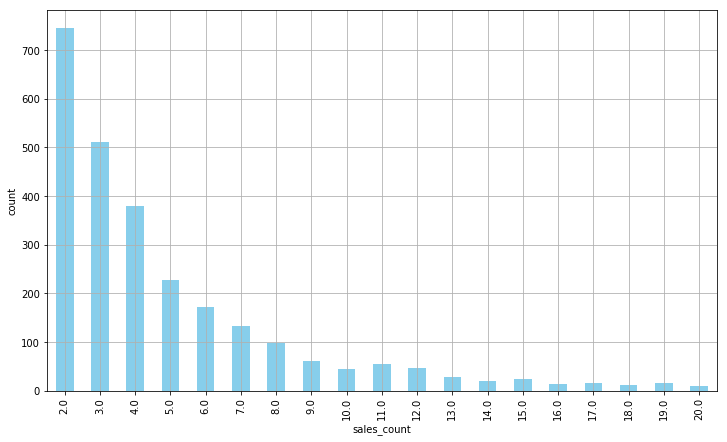

In [23]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [24]:
summary_df['sales_count'].describe()

count    2692.000000
mean        5.971025
std         8.878128
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       201.000000
Name: sales_count, dtype: float64

In [25]:
summary_df['sales_avg'].describe()

count     2692.000000
mean       391.458687
std        465.584404
min          3.450000
25%        197.661000
50%        306.043333
75%        444.524000
max      14844.766667
Name: sales_avg, dtype: float64

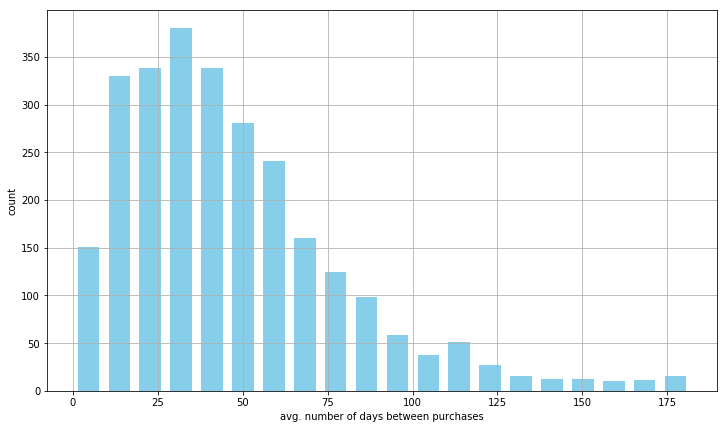

In [35]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [36]:
summary_df['invoicedate_purchase_frequency'].describe()

count    2692.000000
mean       46.999022
std        32.395004
min         0.029412
25%        23.500000
50%        40.500000
75%        62.333333
max       182.000000
Name: invoicedate_purchase_frequency, dtype: float64

In [37]:
summary_df['invoicedate_purchase_duration'].describe()

count    2692.000000
mean      199.720282
std       107.816559
min         1.000000
25%       107.000000
50%       209.000000
75%       296.000000
max       364.000000
Name: invoicedate_purchase_duration, dtype: float64

Given the customer's average value per month of $500 and lifetime span of 20 years, the CLV of this customer turns out to
be $500 * 12 *20 = $120,000. It is common to estimate a customer's  CLV over a period 3-month CLV, or 12-month, even 24-month CLV.

# Predicting 3-Month CLV

## Data Preparation

In [26]:
clv_freq = '3M'

data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

data_df = data_df.reset_index()

data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0
5,12347.0,2011-12-31,1294.32,1294.320,1.0
6,12348.0,2010-12-31,892.80,892.800,1.0
7,12348.0,2011-03-31,227.44,227.440,1.0
8,12348.0,2011-06-30,367.00,367.000,1.0
9,12348.0,2011-09-30,310.00,310.000,1.0


In [28]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}



data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [29]:
data_df.head(10)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1.0,M_1
6,12348.0,2010-12-31,892.80,892.800,1.0,M_5
7,12348.0,2011-03-31,227.44,227.440,1.0,M_4
8,12348.0,2011-06-30,367.00,367.000,1.0,M_3
9,12348.0,2011-09-30,310.00,310.000,1.0,M_2


#### - Building Sample Set

In [30]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]
features_df.shape

(3616, 12)

In [31]:
features_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN
12353.0,NaN,89.000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,89.00,NaN,NaN
12354.0,NaN,1079.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1079.40,NaN,NaN
12355.0,NaN,459.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,459.40,NaN,NaN
12356.0,NaN,481.460,2271.620,NaN,NaN,1.0,1.0,NaN,NaN,481.46,2271.62,NaN


In [32]:
features_df = features_df.fillna(0)
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00


In [33]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.shape

(2407, 2)

In [34]:
response_df.head(10)

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
25,12359.0,2876.85
28,12360.0,1043.78
33,12362.0,2119.85
37,12364.0,299.06
41,12370.0,739.28


In [35]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df.shape

(3616, 14)

In [36]:
sample_set_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
9219,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,NaN
5,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
9219,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,NaN
9219,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,NaN
14,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73
9219,0.00,89.000,0.000,0.00,0.0,1.0,0.0,0.0,0.00,89.00,0.00,0.00,12353.0,NaN
9219,0.00,1079.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,1079.40,0.00,0.00,12354.0,NaN
9219,0.00,459.400,0.000,0.00,0.0,1.0,0.0,0.0,0.00,459.40,0.00,0.00,12355.0,NaN
20,0.00,481.460,2271.620,0.00,0.0,1.0,1.0,0.0,0.00,481.46,2271.62,0.00,12356.0,58.35
9219,484.86,0.000,0.000,0.00,1.0,0.0,0.0,0.0,484.86,0.00,0.00,0.00,12358.0,NaN


In [37]:
sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
9219,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
9219,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
9219,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


In [38]:
sample_set_df['CLV_'+clv_freq].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

## Predictive Model

In [39]:
from sklearn.model_selection import train_test_split
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

#### - Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression

# Try these models as well
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [41]:
reg_fit = LinearRegression()

In [42]:
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
reg_fit.intercept_

80.1062599913704

In [44]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.139248
1,sales_avg_M_3,-0.452011
2,sales_avg_M_4,-0.100268
3,sales_avg_M_5,-0.467033
4,sales_count_M_2,69.666747
5,sales_count_M_3,-87.340505
6,sales_count_M_4,4.575150
7,sales_count_M_5,-56.897197
8,sales_sum_M_2,0.245448
9,sales_sum_M_3,0.543967


##  Evaluation

In [45]:
from sklearn.metrics import r2_score, median_absolute_error
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#### - R-Squared

In [46]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.8402
Out-of-Sample R-Squared: 0.3932


#### - Median Absolute Error

In [47]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 193.3222
Out-of-Sample MSE: 198.2139


#### - Scatter Plot

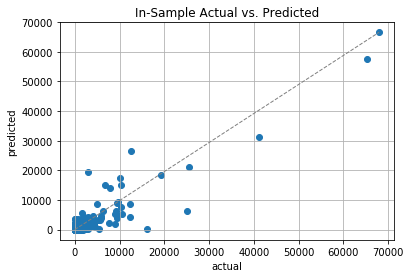

In [48]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

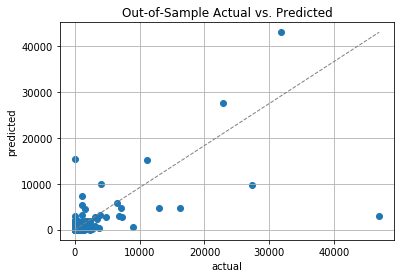

In [49]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()